# Exploración de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from math import sqrt

In [4]:
root = 'España en México.xls'

df = pd.read_excel(root, parse_dates=True, header=1 )
df.head()

WARNING *** file size (32704) not 512 + multiple of sector size (512)


,Elemento,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,NaN,NaN,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,...,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros,Flujos Inversion Bruta en miles de euros
1,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,NaN,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,NaN,03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df = df.drop([0], axis = 0)


KeyError: '[0] not found in axis'

In [10]:
df.head()

,Elemento,Unnamed: 1,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,NaN,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,NaN,03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


In [11]:
df.rename(columns={'Unnamed: 1':'industry',
                        'Elemento': 'country'}, inplace=True)

In [12]:
df.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,NaN,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,NaN,03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,NaN,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


In [13]:
country_name = df['country'][1]
df['country'] = df['country'].replace(np.nan, country_name)

In [14]:
df.head()

,country,industry,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",NaN,267.75,210.97,120.2,NaN,1514.55,1.51,25499,...,0,2.41,580.73,1800.97,6257.97,1503.5,3.06,1.55,2.55,NaN
2,MEXICO,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,MEXICO,03 PESCA Y ACUICULTURA,NaN,NaN,36.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,MEXICO,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,MEXICO,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,NaN


In [15]:
print('Tamaño del DF:', df.shape)
print('Número de valores nulos en cada columna:',df.isnull().sum())

Tamaño del DF: (88, 30)
Número de valores nulos en cada columna: country      0
industry     0
1993        66
1994        63
1995        66
1996        58
1997        55
1998        58
1999        58
2000        55
2001        53
2002        56
2003        60
2004        57
2005        57
2006        59
2007        48
2008        50
2009        46
2010        47
2011        41
2012        48
2013        47
2014        45
2015        40
2016        29
2017        27
2018        30
2019        44
2020        55
dtype: int64


In [16]:
df = df.melt(['industry','country'])
df.head()

,industry,country,variable,value
0,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI...",MEXICO,1993,NaN
1,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL,MEXICO,1993,NaN
2,03 PESCA Y ACUICULTURA,MEXICO,1993,NaN
3,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO",MEXICO,1993,NaN
4,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL,MEXICO,1993,NaN


In [17]:
df = df[['variable','value','country', 'industry']]
df.head()

,variable,value,country,industry
0,1993,NaN,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1,1993,NaN,MEXICO,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
2,1993,NaN,MEXICO,03 PESCA Y ACUICULTURA
3,1993,NaN,MEXICO,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
4,1993,NaN,MEXICO,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


In [18]:
df.rename(columns={'variable':'year',
                        'value': 'investment'}, inplace=True)

In [24]:
df.head()

,investment,country,industry
year,,,
1993,NaN,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1993,NaN,MEXICO,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
1993,NaN,MEXICO,03 PESCA Y ACUICULTURA
1993,NaN,MEXICO,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
1993,NaN,MEXICO,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


In [23]:
df.columns

Index(['investment', 'country', 'industry'], dtype='object')

In [22]:
df.set_index('year', inplace=True)

KeyError: 'year'

In [25]:
df.head()

,investment,country,industry
year,,,
1993,NaN,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1993,NaN,MEXICO,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
1993,NaN,MEXICO,03 PESCA Y ACUICULTURA
1993,NaN,MEXICO,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
1993,NaN,MEXICO,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


In [51]:
df.dtypes

investment    object
country       object
industry      object
dtype: object

In [53]:
df['investment'] = df['investment'].astype(float)
df.dtypes

investment    float64
country        object
industry       object
dtype: object

In [32]:
# Suma total de inversion por año

df_total = df.groupby(('year')).investment.sum().reset_index()


AttributeError: 'Series' object has no attribute 'set_index'

In [29]:
df_total.head()

,year,investment
0,1993,47135.97
1,1994,17017.75
2,1995,8263.11
3,1996,13622.50
4,1997,46830.67


In [30]:
df_total.set_index('year', inplace=True)

In [35]:
df_total

,investment
year,
1993,47135.97
1994,17017.75
1995,8263.11
1996,13622.50
1997,46830.67
1998,35710.18
1999,50166.76
2000,69985.63
2001,35130.27


In [76]:
df.describe()

,investment
count,1046.000000
mean,7672.781597
std,46507.690963
min,0.000000
25%,1.620000
50%,50.000000
75%,747.790000
max,738824.630000


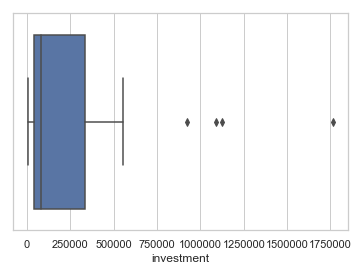

In [77]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df_total["investment"])

## Analisis general de la inversión de empresas españolas en México 

In [49]:
df_total.dtypes

investment    float64
dtype: object

Text(0.5, 1.0, 'Evolución de la inversión de empresas españolas en México')

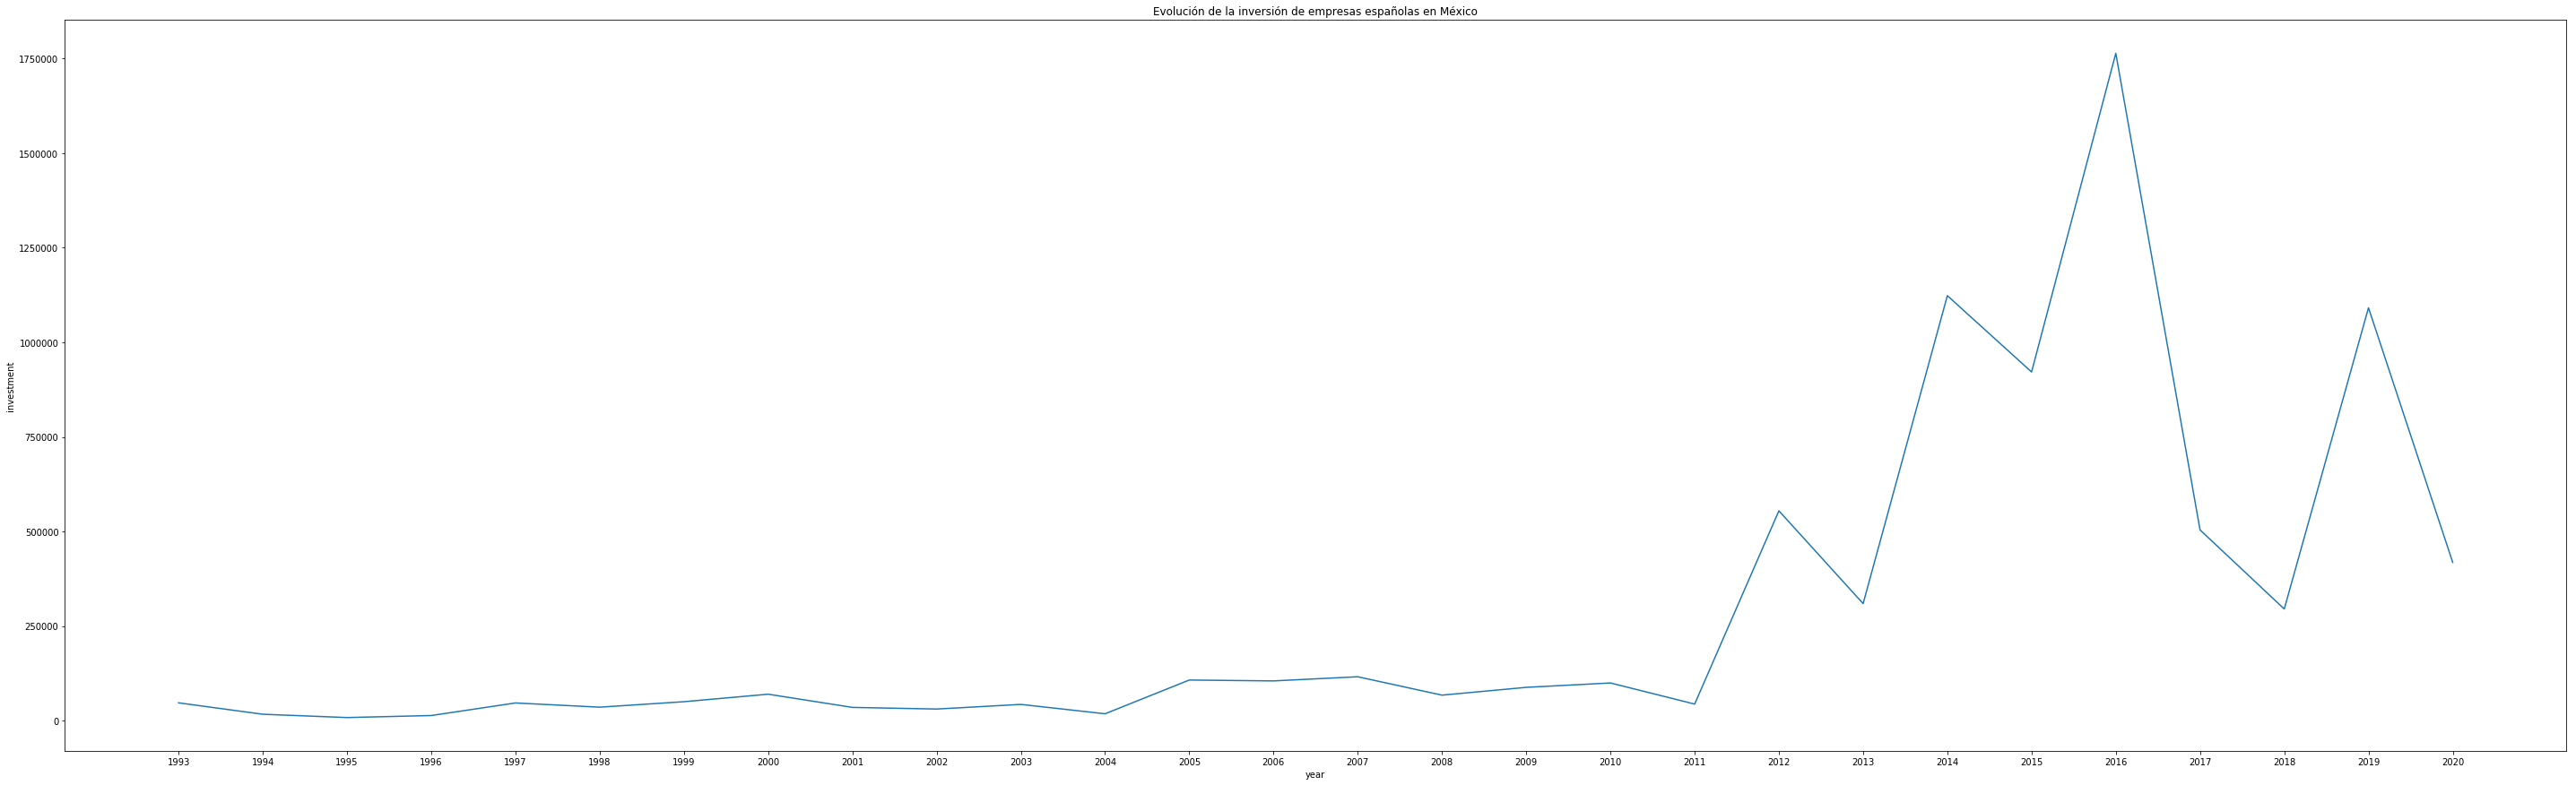

In [34]:
plt.figure(figsize=(50,15))
sns.lineplot(data=df_total, x='year', y='investment')
plt.title('Evolución de la inversión de empresas españolas en México')

In [42]:
df_max = df_total['investment'].max()

In [43]:
df_total.loc[df_total['investment'] == df_max]

,investment
year,
2016,1763920.89


## Analisis por sector de la inversión de empresas españolas en México 

In [54]:
df.head()

,investment,country,industry
year,,,
1993,NaN,MEXICO,"01 AGRICULTURA, GANADERÍA, CAZA Y SERV. RELACI..."
1993,NaN,MEXICO,02 SILVICULTURA Y EXPLOTACIÓN FORESTAL
1993,NaN,MEXICO,03 PESCA Y ACUICULTURA
1993,NaN,MEXICO,"05 EXTRACCIÓN DE ANTRACITA, HULLA Y LIGNITO"
1993,NaN,MEXICO,06 EXTRACCIÓN DE CRUDO DE PETRÓLEO Y GAS NATURAL


In [55]:
df.dtypes

investment    float64
country        object
industry       object
dtype: object

Text(0.5, 1.0, 'Evolución por sector de la inversión de empresas españolas en México')

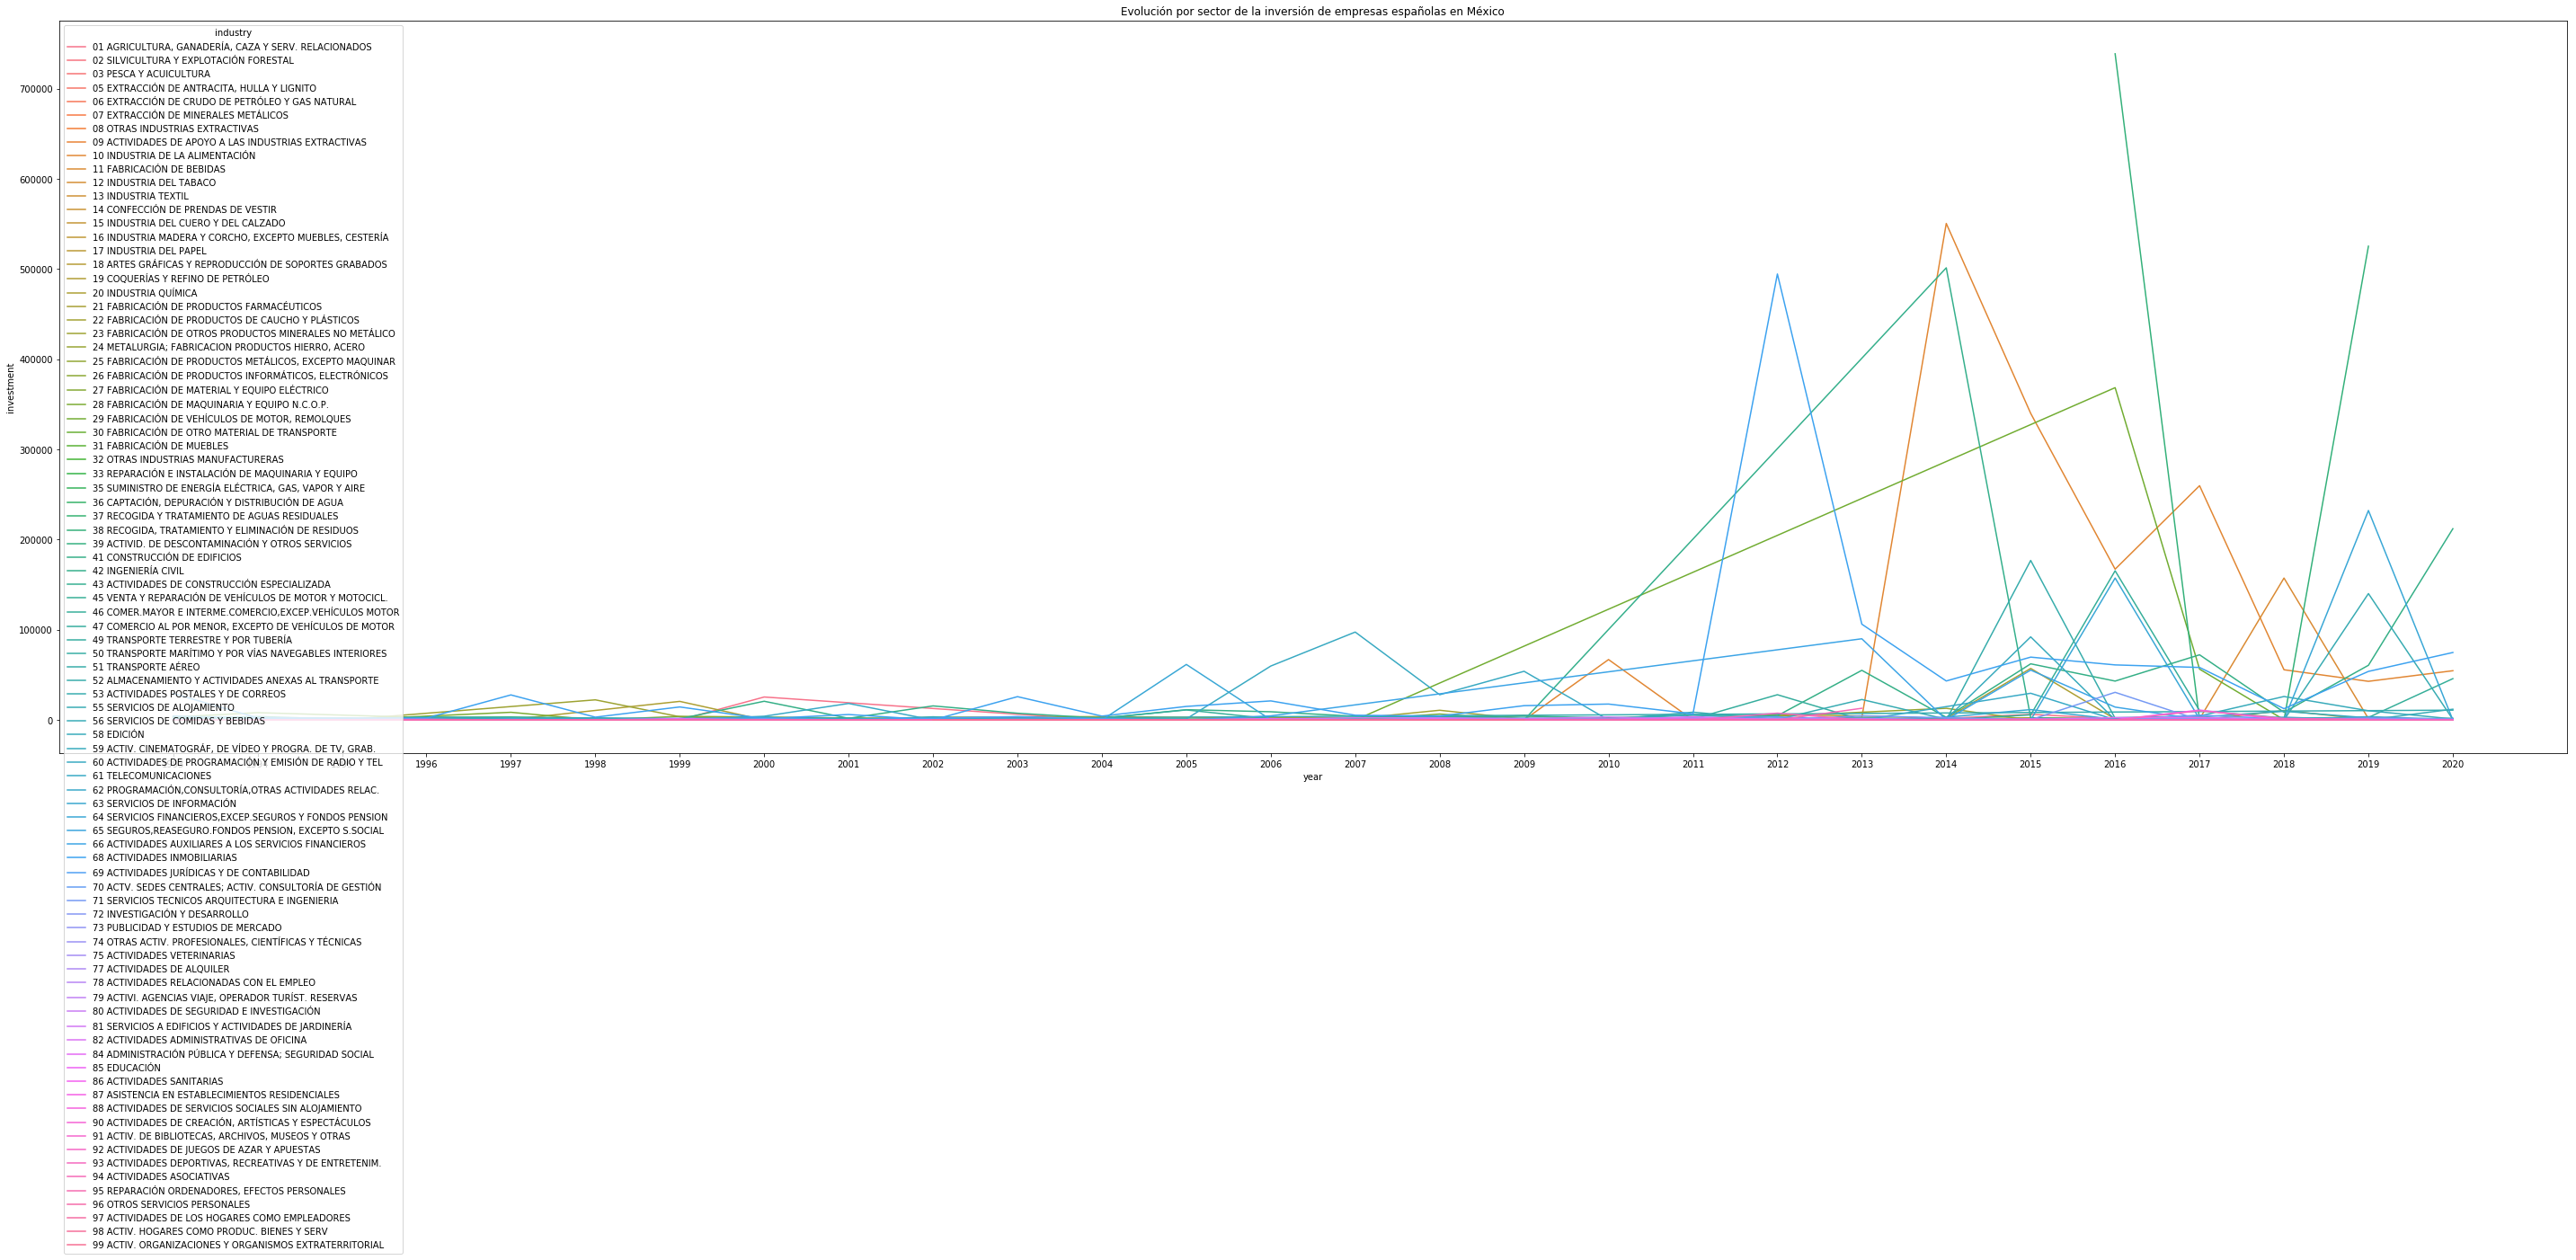

In [56]:
plt.figure(figsize=(50,15))
sns.lineplot(data=df, x='year', y='investment', hue='industry')
plt.title('Evolución por sector de la inversión de empresas españolas en México')

In [70]:
df_industry = df.groupby('industry').investment.sum().sort_values(ascending=False).reset_index()


In [72]:
df_industry.head(10)

,industry,investment
0,10 INDUSTRIA DE LA ALIMENTACIÓN,1548270.82
1,"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESI...",1264269.25
2,68 ACTIVIDADES INMOBILIARIAS,1179823.47
3,41 CONSTRUCCIÓN DE EDIFICIOS,625453.52
4,42 INGENIERÍA CIVIL,505040.35
5,"64 SERVICIOS FINANCIEROS,EXCEP.SEGUROS Y FONDO...",463091.76
6,"29 FABRICACIÓN DE VEHÍCULOS DE MOTOR, REMOLQUES",436579.72
7,"46 COMER.MAYOR E INTERME.COMERCIO,EXCEP.VEHÍCU...",280392.32
8,60 ACTIVIDADES DE PROGRAMACIÓN Y EMISIÓN DE RA...,242993.54
9,55 SERVICIOS DE ALOJAMIENTO,187957.56


In [82]:
df_industry.set_index('industry', inplace=True)
df_industry.head()

,investment
industry,
10 INDUSTRIA DE LA ALIMENTACIÓN,1548270.82
"38 RECOGIDA, TRATAMIENTO Y ELIMINACIÓN DE RESIDUOS",1264269.25
68 ACTIVIDADES INMOBILIARIAS,1179823.47
41 CONSTRUCCIÓN DE EDIFICIOS,625453.52
42 INGENIERÍA CIVIL,505040.35


Text(0.5, 1.0, 'Volumen de la inversión por sector')

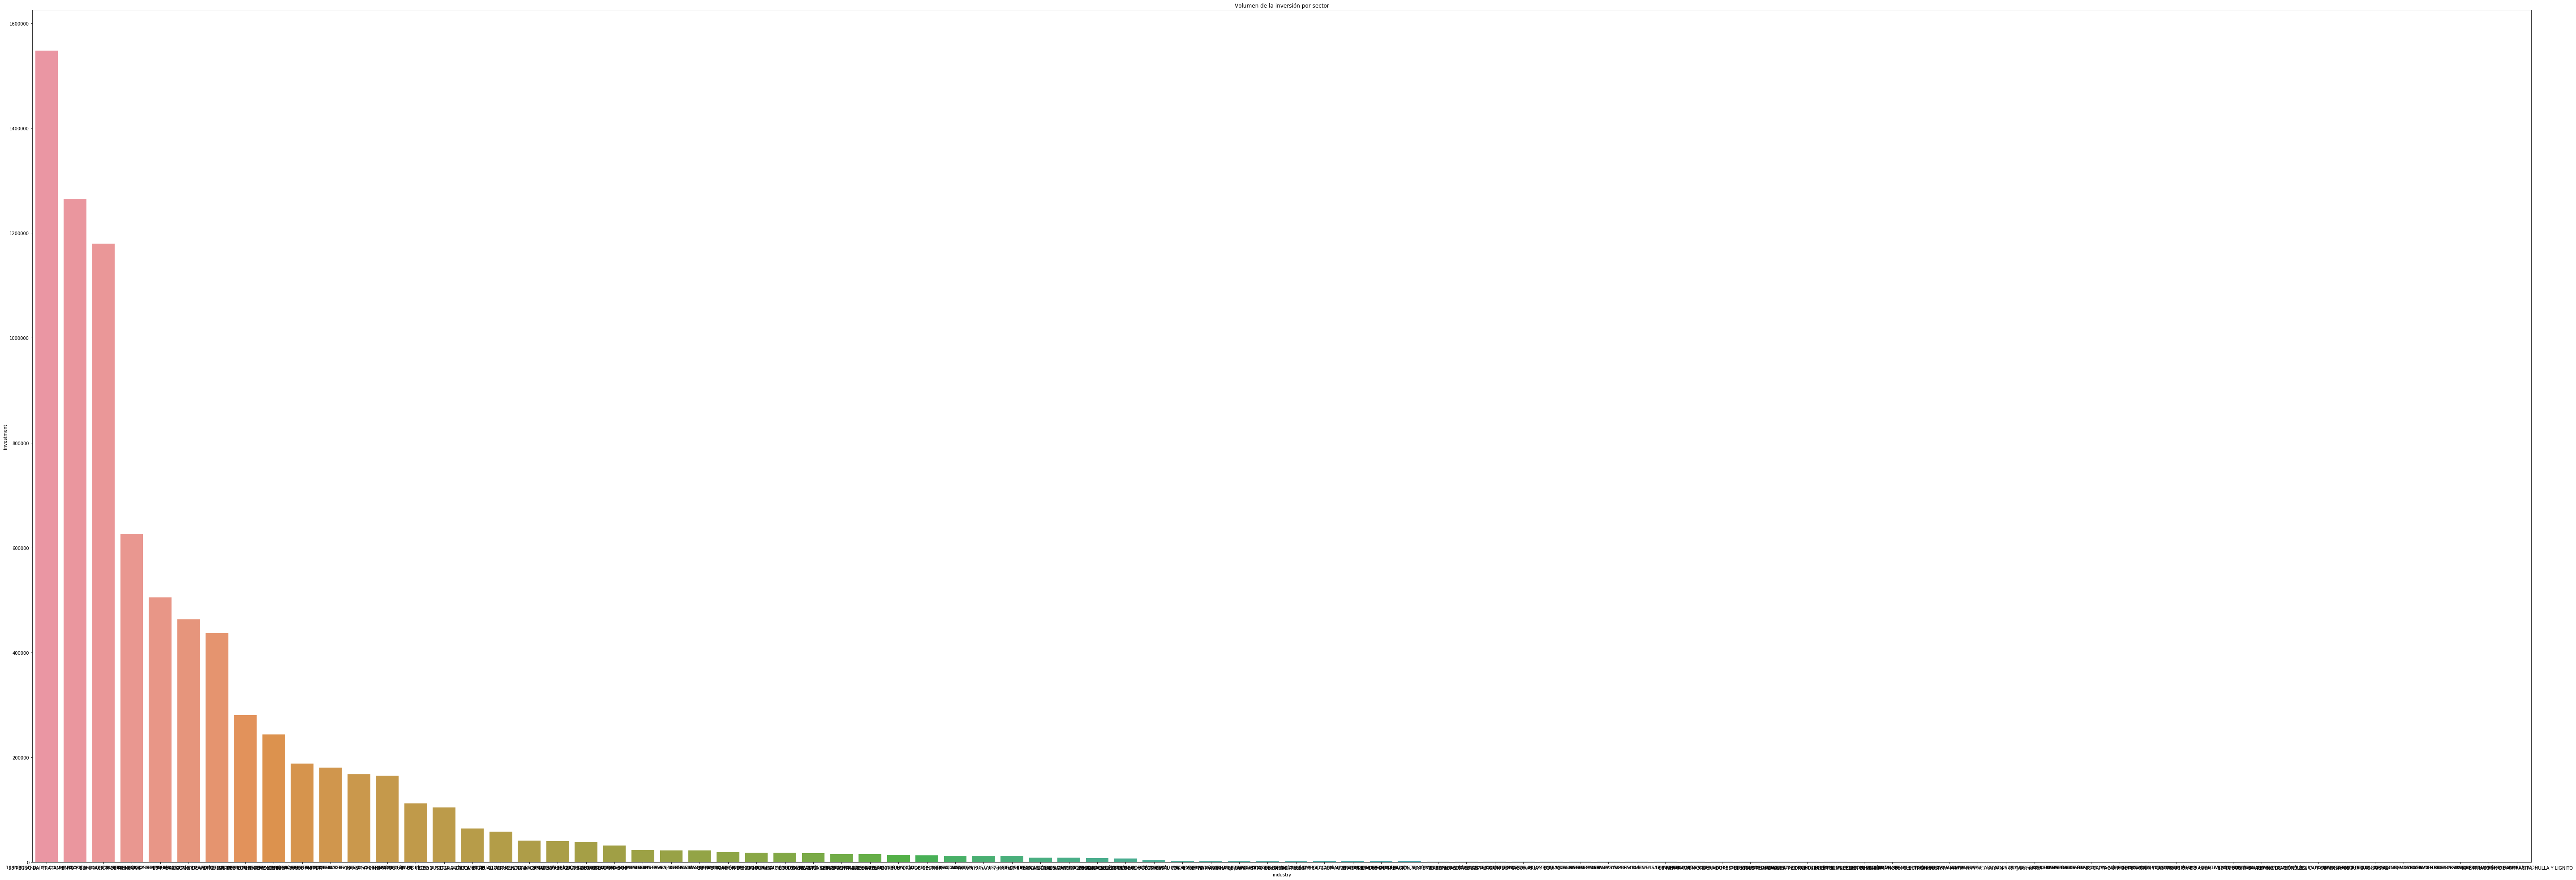

In [74]:
plt.figure(figsize=(100,35))
sns.barplot(data=df_industry, x='industry', y='investment')
plt.title('Volumen de la inversión por sector')

In [75]:
df_industry.describe()

,investment
count,8.800000e+01
mean,9.120147e+04
std,2.627967e+05
min,0.000000e+00
25%,1.870850e+02
50%,2.374625e+03
75%,2.218994e+04
max,1.548271e+06


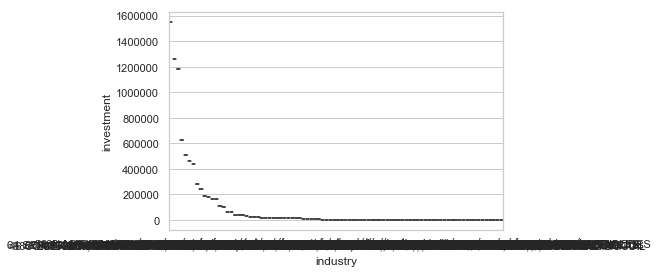

In [78]:
ax = sns.boxplot(x="industry", y="investment", data=df_industry)

In [81]:
sum_investment = df_industry['investment'].sum()

In [89]:
for df_industry in ['investment']:
    df_industry['% total'] = df_industry['investment'] / sum_investment * 100

TypeError: string indices must be integers